In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
datapath = "Herwig_qcd_features.h5"
df = pd.read_hdf(datapath)

In [3]:
df

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2
0,-1062.890015,-628.263000,1.169330,223.070007,186.315994,108.044998,68.937798,785.325012,370.963013,-111.802002,67.170799,50.092701,28.765200,15.288100
1,-561.768005,-1116.109985,-865.270020,242.136002,88.407402,20.304501,12.437700,508.622009,966.379028,-325.015015,77.530197,36.413601,31.230499,24.091101
2,-1737.829956,-749.458008,-321.303009,95.748199,30.898800,22.592400,16.777599,929.109009,955.013977,1421.810059,583.320984,342.750000,61.851898,36.460602
3,-798.586975,918.947998,2056.659912,440.657013,238.959000,144.123993,71.498199,537.398987,-838.393005,-1693.349976,144.897003,36.847801,28.074800,14.404400
4,647.491028,-1165.069946,-59.776699,51.966702,24.274799,4.958610,2.036370,-794.692993,1014.479980,-1927.390015,116.587997,41.674801,18.256599,12.612700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-710.262024,-1026.920044,-1307.729980,796.106995,744.283020,368.661987,210.828003,692.814026,976.697998,-41.325802,32.149200,10.357700,7.979660,4.746760
999995,-268.907990,1307.540039,1420.180054,333.614014,240.792007,171.697006,130.660995,155.938995,-1274.060059,-1473.140015,124.994003,86.582901,25.811399,18.830799
999996,65.702904,-1444.400024,-1056.260010,77.524902,39.939301,23.995701,13.755400,314.462006,1388.619995,-158.914001,420.259003,295.635986,57.412300,44.277100
999997,-133.639999,1522.699951,-229.511993,632.781006,504.207001,105.698997,48.149700,29.203501,-1470.739990,-839.638977,189.417999,60.181000,42.477699,32.273899


In [4]:
def computemjj_np(event):
    px1 = event[:,0]
    py1 = event[:,1]
    pz1 = event[:,2]
    pE1 = np.sqrt(px1**2+py1**2+pz1**2+event[:,3]**2)
    
    px2 = event[:,7]
    py2 = event[:,8]
    pz2 = event[:,9]
    pE2 = np.sqrt(px2**2+py2**2+pz2**2+event[:,10]**2)
    
    m2 = (pE1+pE2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2
    return np.sqrt(m2)

In [5]:
herwig_np = df.to_numpy()
mjj_herwig = computemjj_np(herwig_np)
mjj_herwig

array([2096.18175627, 2397.09079043, 3707.09535248, ..., 3028.00084892,
       3198.57333649, 3638.00693971])

In [6]:
minmass_herwig = np.array(df[['mj1','mj2']].min(axis=1))
maxmass_herwig = np.array(df[['mj1','mj2']].max(axis=1))

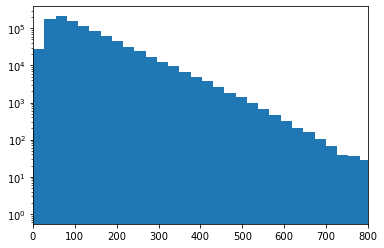

In [7]:
plt.yscale('log')
plt.xlim(0,800)
hist=plt.hist(minmass_herwig,bins=50)

(array([9.37600e+03, 6.55270e+04, 1.03325e+05, 1.13114e+05, 1.09579e+05,
        9.97220e+04, 8.84960e+04, 7.67230e+04, 6.58990e+04, 5.53940e+04,
        4.71080e+04, 3.83760e+04, 3.21630e+04, 2.53950e+04, 2.01810e+04,
        1.54280e+04, 1.14860e+04, 7.91200e+03, 5.26100e+03, 3.33200e+03,
        2.19600e+03, 1.35300e+03, 9.15000e+02, 5.60000e+02, 3.36000e+02,
        2.57000e+02, 1.97000e+02, 1.30000e+02, 7.80000e+01, 6.50000e+01,
        3.00000e+01, 2.20000e+01, 1.60000e+01, 1.80000e+01, 1.00000e+01,
        9.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  13.25669956,   52.04596498,   90.83523041,  129.62449583,
         168.41376125,  207.20302668,  245.9922921 ,  284.78155752,
         323.57082294,  362.36008837,  401.14935379,  439.93861921,
         478.72788464,  517.51715006,  556.30641548,  595.095680

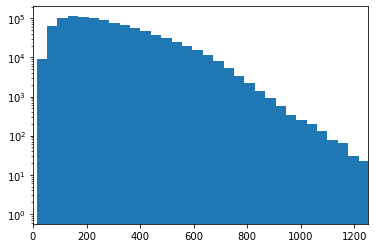

In [8]:
plt.yscale('log')
plt.xlim(0,1250)
plt.hist(maxmass_herwig,bins=50)

In [9]:
num=50

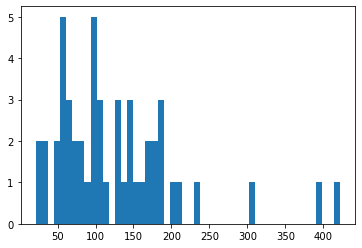

In [10]:
hist=plt.hist(minmass_herwig[0:num],bins=50)

In [11]:
B1=minmass_herwig[0:num].reshape(-1, 1)

In [12]:
B2=maxmass_herwig[0:num].reshape(-1, 1)

In [13]:
B2

array([[223.07000732],
       [242.13600159],
       [583.32098389],
       [440.65701294],
       [116.58799744],
       [168.36399841],
       [ 57.32740021],
       [ 76.89109802],
       [170.48699951],
       [303.00201416],
       [190.36399841],
       [220.47099304],
       [488.59500122],
       [649.33898926],
       [189.02099609],
       [625.72497559],
       [390.26400757],
       [138.62199402],
       [145.85800171],
       [496.81500244],
       [284.76599121],
       [ 45.00569916],
       [117.67299652],
       [312.10400391],
       [670.67297363],
       [269.75601196],
       [126.01100159],
       [325.50601196],
       [371.38198853],
       [313.70700073],
       [ 60.71829987],
       [115.88400269],
       [432.63198853],
       [116.34799957],
       [286.64801025],
       [577.81402588],
       [169.99899292],
       [104.21399689],
       [129.60899353],
       [465.20098877],
       [ 84.27220154],
       [278.63198853],
       [ 95.02909851],
       [196

In [14]:
combined = np.column_stack((B1, B2))

In [15]:
combined

array([[ 67.17079926, 223.07000732],
       [ 77.53019714, 242.13600159],
       [ 95.74819946, 583.32098389],
       [144.89700317, 440.65701294],
       [ 51.96670151, 116.58799744],
       [104.55899811, 168.36399841],
       [ 25.49370003,  57.32740021],
       [ 50.5923996 ,  76.89109802],
       [ 59.12400055, 170.48699951],
       [128.61099243, 303.00201416],
       [169.1190033 , 190.36399841],
       [210.03799438, 220.47099304],
       [177.01699829, 488.59500122],
       [139.63400269, 649.33898926],
       [ 56.75559998, 189.02099609],
       [165.17100525, 625.72497559],
       [306.68798828, 390.26400757],
       [ 94.87599945, 138.62199402],
       [ 79.92849731, 145.85800171],
       [422.18499756, 496.81500244],
       [ 31.59880066, 284.76599121],
       [ 32.7256012 ,  45.00569916],
       [112.22899628, 117.67299652],
       [ 92.21099854, 312.10400391],
       [145.71200562, 670.67297363],
       [129.54600525, 269.75601196],
       [106.36699677, 126.01100159],
 

Iterations: 0	 Discriminator loss: 10.3968	 Generator loss: 8.9097


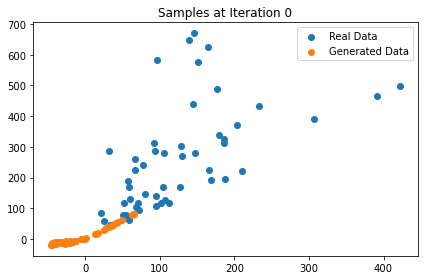

Iterations: 1	 Discriminator loss: 1.1333	 Generator loss: 3.7163
Iterations: 2	 Discriminator loss: 0.6884	 Generator loss: 1.8525
Iterations: 3	 Discriminator loss: 0.7663	 Generator loss: 0.9007
Iterations: 4	 Discriminator loss: 0.7856	 Generator loss: 0.8353
Iterations: 5	 Discriminator loss: 1.1574	 Generator loss: 0.6610
Iterations: 6	 Discriminator loss: 0.9304	 Generator loss: 0.6507
Iterations: 7	 Discriminator loss: 1.1015	 Generator loss: 0.7945
Iterations: 8	 Discriminator loss: 0.9238	 Generator loss: 0.7570
Iterations: 9	 Discriminator loss: 0.9947	 Generator loss: 0.8086
Iterations: 10	 Discriminator loss: 1.0467	 Generator loss: 0.2640


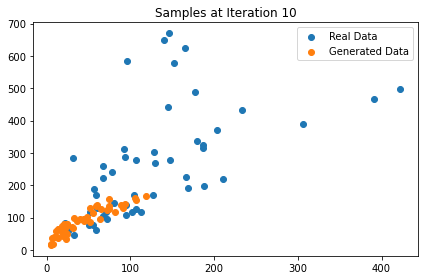

Iterations: 11	 Discriminator loss: 1.2129	 Generator loss: 0.9991
Iterations: 12	 Discriminator loss: 1.0864	 Generator loss: 0.3093

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
tf.reset_default_graph()

import matplotlib.pyplot as plt


def get_y(x):
    return 10 + x*x



def sample_Z(m, n):
    return np.random.uniform(0., 300., size=[m, n])

def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3


X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step



# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = num
nd_steps = 10
ng_steps = 10

x_plot = combined

f = open('loss_logs.csv','w')
f.write('Iteration,Discriminator Loss,Generator Loss\n')

for i in range(10001):
    X_batch = combined
    Z_batch = sample_Z(batch_size, 2)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
    if i%10 == 0:
        f.write("%d,%f,%f\n"%(i,dloss,gloss))
    if i%10 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()

f.close()

In [ ]:
        X_batch = combined
        Z_batch = sample_Z(1000000, 2)
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])

In [ ]:
r_rep.summary()

In [ ]:
Z_batch

In [ ]:
gen=Z_batch.flatten()

In [ ]:
hist=plt.hist(gen,bins=50)